In [3]:
import umap
import numpy as np
import os
import argparse
import time

embedmatfile = "disprot_plotdata17102022/halft5/embedding_data.txt.npz"

In [4]:
s = time.time()
print("Loading embedding..")
loaded_data = np.load(embedmatfile)
embeddings = loaded_data["concat_emb"]
e = time.time() - s
print(f"Loaded in {e}!")

Loading embedding..
Loaded in 58.41098475456238!


In [5]:
embeddings.shape

(903246, 1024)

In [6]:
# load seq and annotation data
seqfile = "disprot_plotdata17102022/halft5/seq_data.txt"
annfile = "disprot_plotdata17102022/halft5/annot_data.txt"

with open(seqfile) as instr:
    seq = instr.readlines()[0]
    
with open(annfile) as instr:
    annot = instr.readlines()[0]
    
print(len(seq), len(annot))

903246 903246


In [7]:
SEQ = [aa for aa in seq]
ANNOT = [an for an in annot]
AAs = set(SEQ)

In [20]:
aa_sel = "K"
ix_aa = [SEQ[i] == aa_sel for i in range(0, len(SEQ)) ]

singleaa_embeds = embeddings[ix_aa, :]
print(singleaa_embeds.shape)

(57426, 1024)


In [24]:
n = 200
md = 0.5
my_umap = umap.UMAP(n_neighbors=n, min_dist=md)
umap_embed = my_umap.fit_transform(singleaa_embeds)


In [25]:
singleaa_annots = [x for i,x in enumerate(ANNOT) if ix_aa[i]]
print(len(singleaa_annots))

57426


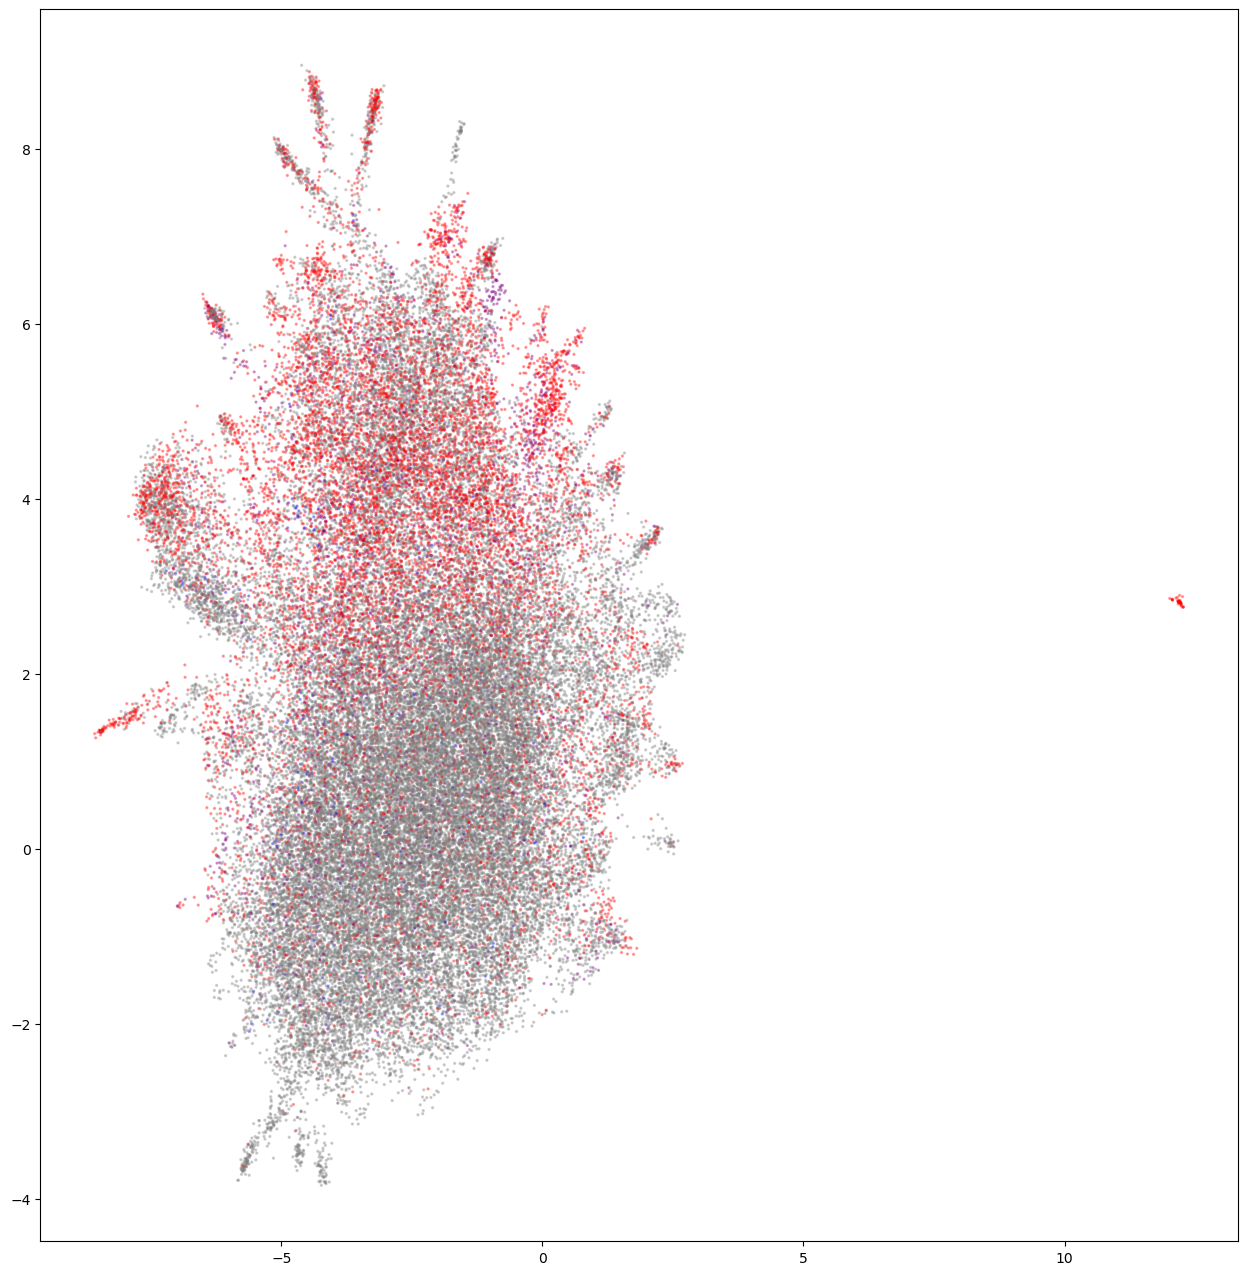

In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch

DDs = sorted(list(set(singleaa_annots)))
colordictDD = dict()
for d in DDs:
    if d == "-":
        colordictDD[d] = "gray"
    elif d == "D":
        colordictDD[d] = "red"
    elif d == "F":
        colordictDD[d] = "blue"
    elif d == "S":
        colordictDD[d] = "green"
    elif d == "T":
        colordictDD[d] = "purple"

# Aminoacid colors
fig = plt.figure(figsize=(34,16))
ax1 = fig.add_subplot(121)
ax1.scatter(umap_embed[:,0], umap_embed[:,1], s=2, alpha=0.3, 
           c=[colordictDD[x] for x in singleaa_annots])

# legend_elements = [Patch(facecolor=colordictDD[x], edgecolor=colordictDD[x],label=x) for x in DDs]
# ax2.legend(handles=legend_elements, loc='right')

# plt.savefig(f"{aa_sel}_embedding.png", bbox_inches='tight')
plt.show()